In [1]:
import os
from mrcnn.model import MaskRCNN
from definitions import FireDataset, ModelConfig, plot_actual_vs_predicted

Using TensorFlow backend.


In [2]:
TRAIN_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/renamed_FireNet/train"
VALIDATION_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/renamed_FireNet/validation"
TEST_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/renamed_FireNet/test"

NOFIRE_TRAIN_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/no_fire/train"
NOFIRE_VALIDATION_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/no_fire/validation"
NOFIRE_TEST_DIR = "/media/jamnicki/HDD/__Datasets/Fire-dataset/no_fire/test"

PLOTS_DIR = "./plots"
WEIGHTS_DIR = "./weights"

In [3]:
# load the train dataset
train_set = FireDataset()
train_set.load_dataset(TRAIN_DIR, is_train=True)
train_set.load_dataset(NOFIRE_TRAIN_DIR, is_train=True)
train_set.prepare()
print("Train: %d" % len(train_set.image_ids))

# load the test dataset
validation_set = FireDataset()
validation_set.load_dataset(VALIDATION_DIR, is_train=False)
validation_set.load_dataset(NOFIRE_VALIDATION_DIR, is_train=False)
validation_set.prepare()
print("Validation: %d" % len(validation_set.image_ids))

# load the test dataset
test_set = FireDataset()
test_set.load_dataset(TEST_DIR, is_train=False)
test_set.load_dataset(NOFIRE_TEST_DIR, is_train=False)
test_set.prepare()
print("Test: %d" % len(test_set.image_ids))

# create config
cfg = ModelConfig()

Train: 633
Validation: 114
Test: 27


In [ ]:
# define the training model
training_model = MaskRCNN(
    mode="training",
    model_dir="./training_models",
    config=cfg
)

# # load model weights
coco_weights_filename = "mask_rcnn_coco.h5"
training_model_path = os.path.join(WEIGHTS_DIR, coco_weights_filename)
training_model.load_weights(
    training_model_path,
    by_name=True,
    exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"]
)

# train model
training_model.train(
    train_dataset=train_set,
    val_dataset=validation_set,
    learning_rate=cfg.LEARNING_RATE,
    layers="heads",
    epochs=cfg.EPOCHS
)

# save trained weights
weights_filename = f"{cfg.EPOCHS}x{cfg.STEPS_PER_EPOCH}__fire_mask_rcnn_trained.h5"
fire_weights_path = os.path.join(WEIGHTS_DIR, weights_filename)
training_model.keras_model.save_weights(fire_weights_path)



Instructions for updating:
Use `tf.cast` instead.


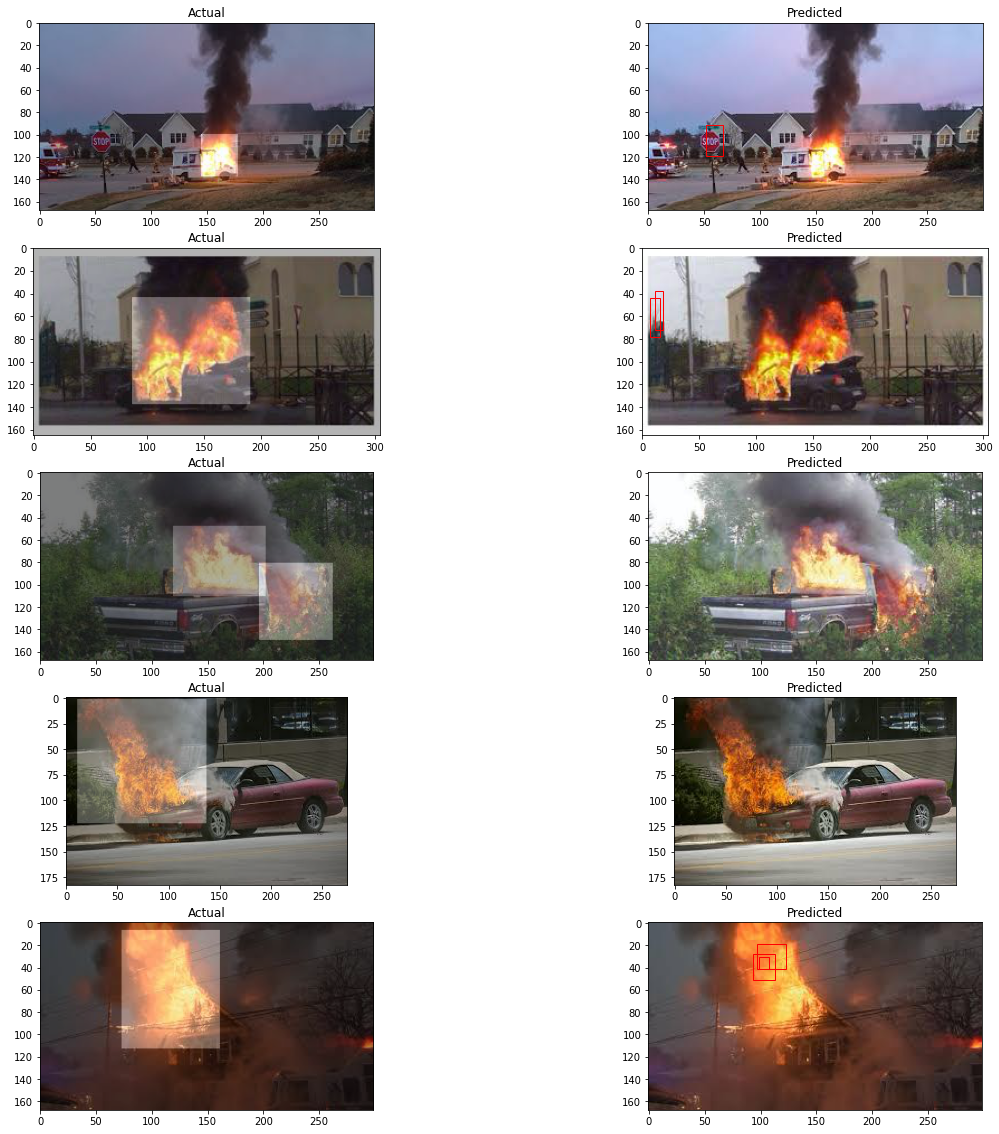

In [5]:
# define the model
model = MaskRCNN(mode="inference", model_dir="./models", config=cfg)

# load model weights
model.load_weights(
    fire_weights_path,
    by_name=True
)

plot_actual_vs_predicted(
    dataset=test_set,
    model=model,
    cfg=cfg,
    figname=f"{cfg.EPOCHS}x{cfg.STEPS_PER_EPOCH}__test_actual_vs_predicted",
    plots_dir=PLOTS_DIR,
    n_images=5,
    save=True
)